<h1 align="center">Rotaciones pequeñas consecutivas</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## 2. Planteamiento del problema

Sea un operador de rotación $\hat{P}_{\theta_\alpha}$ correspondiente a una rotación de un ángulo $\theta_\alpha \ll 1$ alrededor del eje $\alpha$, donde $\alpha$ puede ser $x, y, z$.  La aplicación de dos rotaciones consecutivas alrededor de diferentes ejes están relacionadas por la siguiente expresión.

$$ \hat{P}_{\theta_y}\hat{P}_{\theta_x} = \hat{P}_{(\theta_x \theta_y)_z}\hat{P}_{\theta_x}\hat{P}_{\theta_y}$$

Donde $\hat{P}_{(\theta_x \theta_y)_z}$ corresponde a una rotación alrededor del eje $z$ de un ángulo igual al producto del ángulo rotado alrededor del eje $x$ ($\theta_x$) y el ángulo rotado alrededor del eje $y$ ($\theta_y$).  Esta expresión es válida para ángulos pequeños, menores a un radian.

## 4. Métodos y definiciones

In [2]:
r = [1, 0, 0]
N = 25
theta = 15*np.pi/180

In [3]:
def Px(r, delta_theta):
    x = r[0]
    y = r[1]     - r[2]*delta_theta
    z = r[1]*delta_theta + r[2]
    return [x, y, z]

In [4]:
def Py(r, delta_theta):
    x = r[0]     - r[2]*delta_theta
    y = r[1]
    z = r[0]*delta_theta + r[2]
    return [x, y, z]

In [5]:
def Pz(r, delta_theta):
    x = r[0]     - r[1]*delta_theta
    y = r[0]*delta_theta + r[1]
    z = r[2]
    return [x, y, z]

In [6]:
def plot(r, operator, theta=theta, dpi=300):
    for n in range(N):
        clear_output(wait=True)
        delta_theta = theta/N
        r = operator(r, delta_theta)
        plt.figure(dpi=dpi)
        ax = plt.axes(projection='3d')
        ax.plot3D([0, r[0]], [0, r[1]], [0, r[2]], 'red')
        ax.plot3D([0, r[0]], [r[1], r[1]], [r[2], r[2]], 'gray', alpha=0.9)
        ax.plot3D([0, 0], [0, r[1]], [r[2], r[2]], 'gray', alpha=0.9)
        ax.plot3D([0, 0], [0, 0], [0, r[2]], 'gray', alpha=0.9)
        ax.plot3D([0, 0.1], [0, 0.1], [0, 0.1], 'white', alpha=0.1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(0.0, 1.0)
        ax.set_ylim(0.0, 1.0)
        ax.set_zlim(0.0, 1.0)
        plt.show() 
        time.sleep(0.01)
        #print(np.linalg.norm(r))
    return np.round(r, 2)

## 5. Figuras

### 5.1. Aplicación del operador $\hat{P}_{\theta_y}\hat{P}_{\theta_y}$ sobre un vector

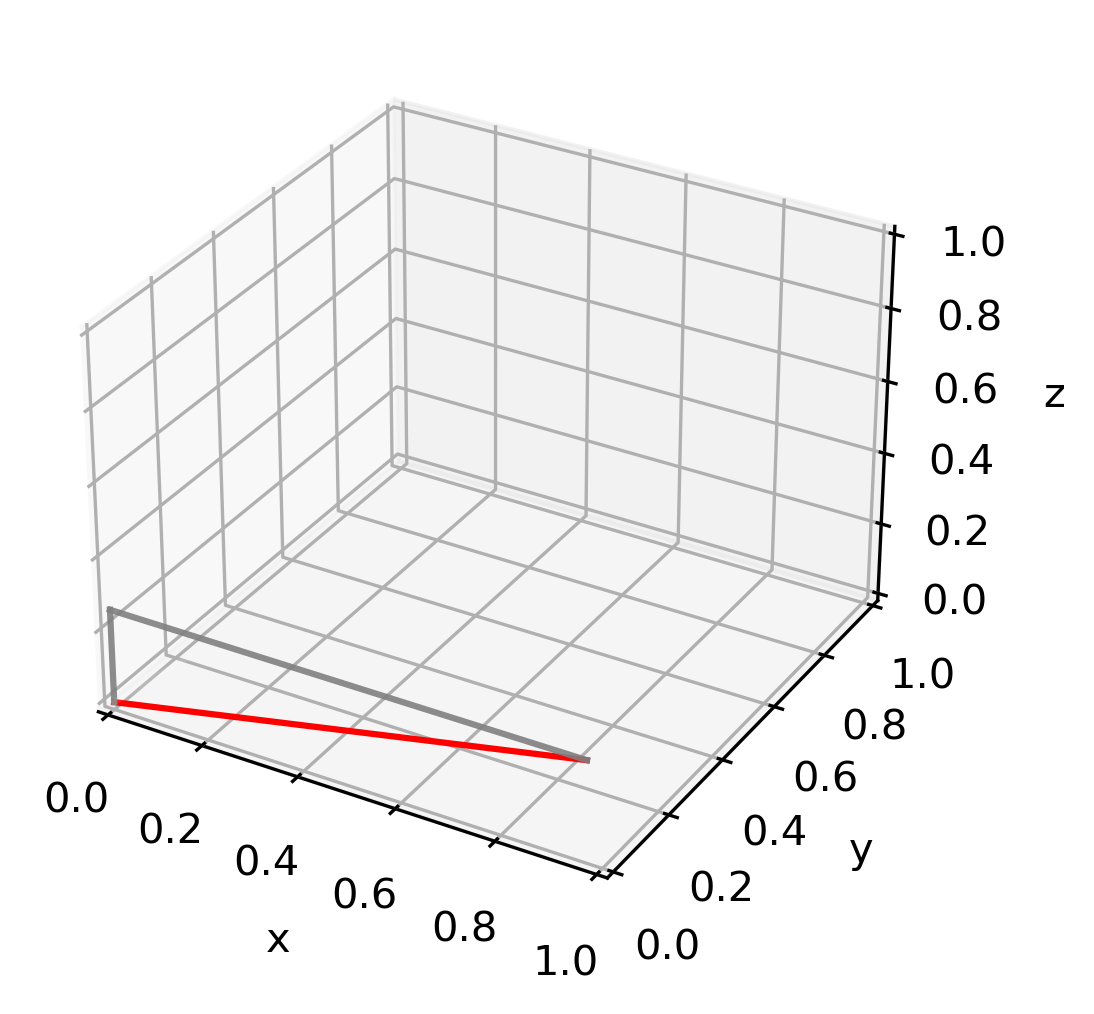

array([0.97, 0.  , 0.26])

In [7]:
plot(plot(r, Px), Py)

### 5.2. Aplicación del operador $\hat{P}_{\theta_x}\hat{P}_{\theta_y}$ sobre un vector

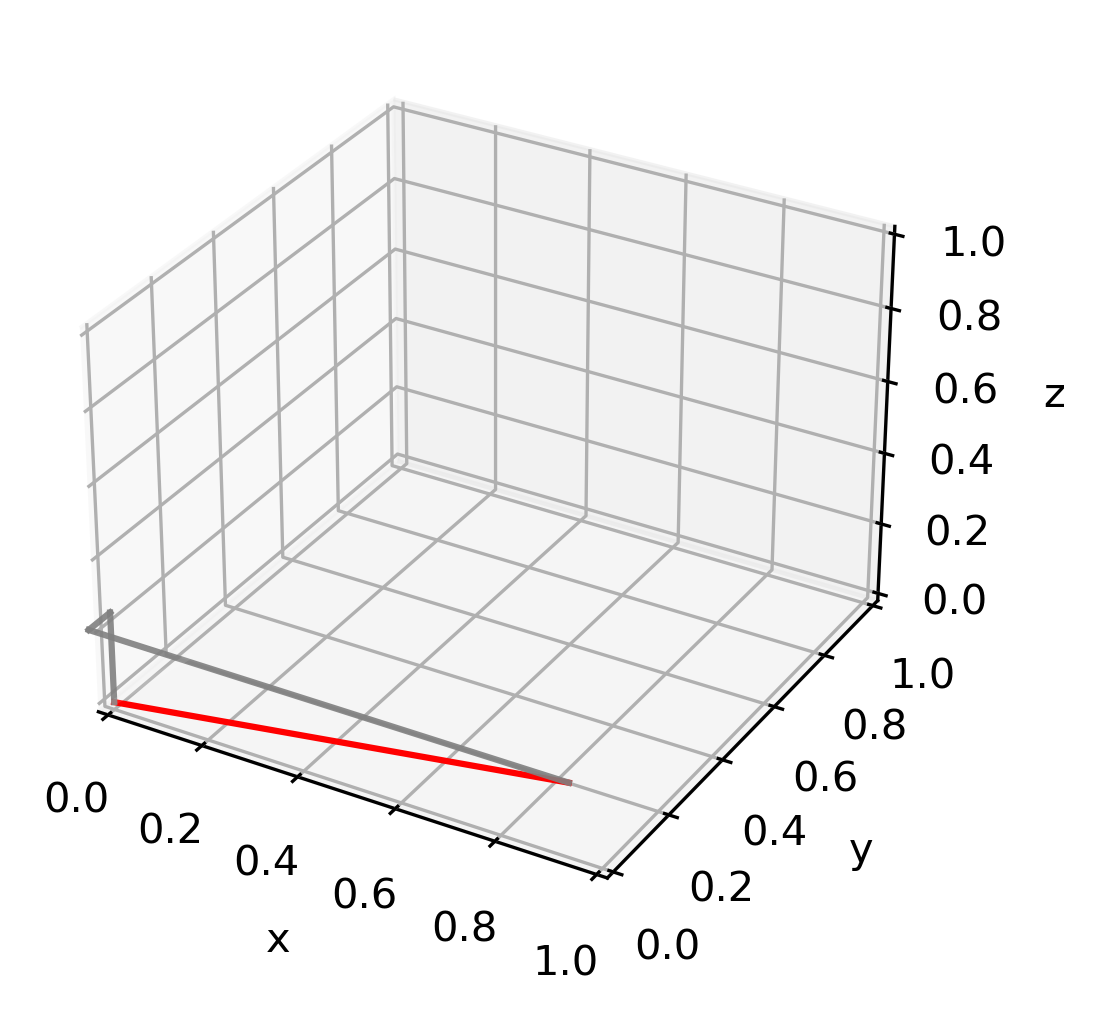

array([ 0.97, -0.07,  0.25])

In [8]:
plot(plot(r, Py), Px)

### 5.3. Aplicación del operador $\hat{P}_{\theta_z=\theta_x \theta_y}\hat{P}_{\theta_y}\hat{P}_{\theta_x}$ sobre un vector

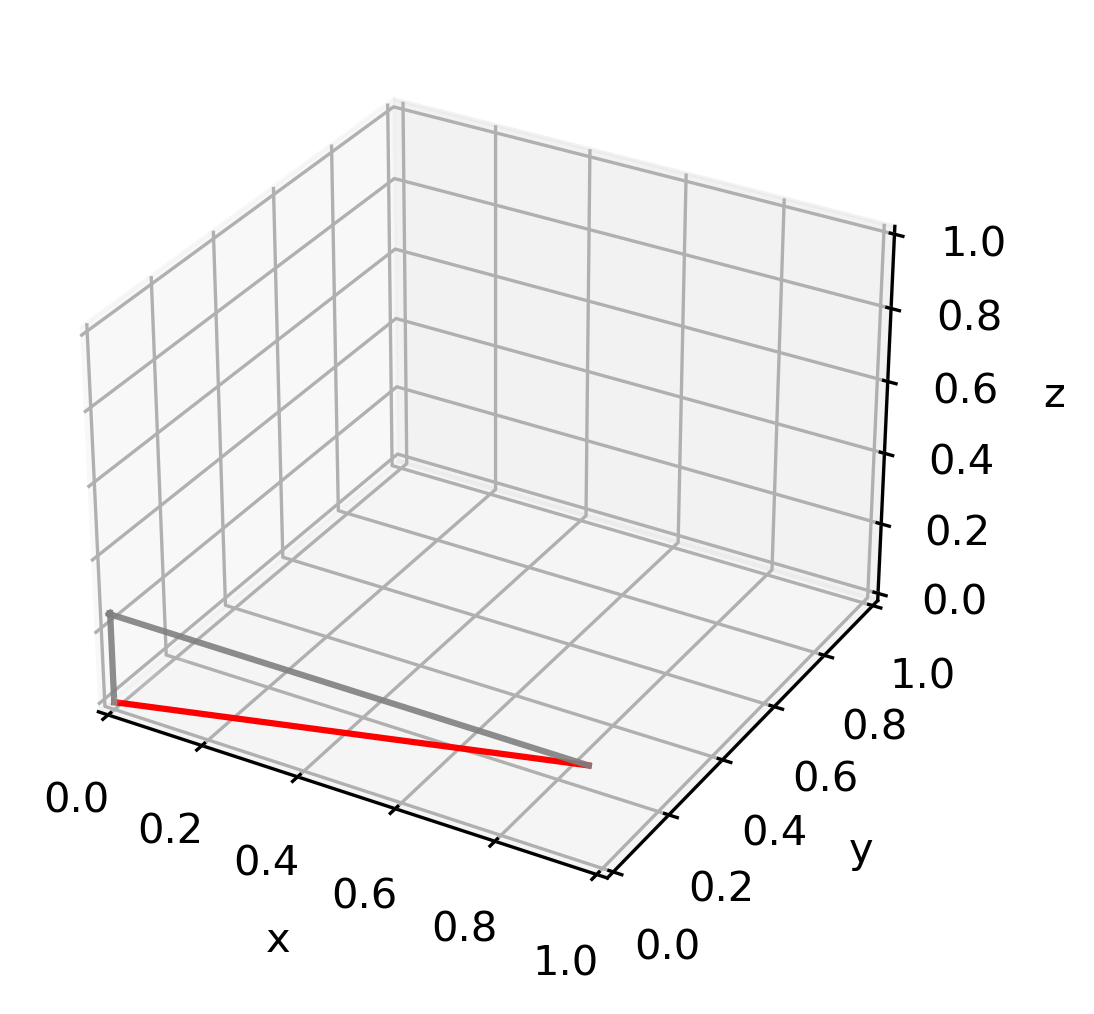

array([ 0.97, -0.  ,  0.25])

In [9]:
plot(plot(plot(r, Py), Px), Pz, theta=theta**2)

End!